In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np

In [14]:
!pip install scipy

     |████████████████████████████████| 34.5 MB 479 kB/s eta 0:00:01


In [45]:
import numpy as np
from scipy import stats
# gaps = [39.80582524271845, 34.946236559139784, 30.584192439862544, 43.42105263157895, 42.85714285714286, 23.002421307506047]
gaps = [39.80582524271845, 34.946236559139784, 30.584192439862544, 43.42105263157895]
og_gaps = [29, 41, 38, 41]
def compute_z_score(old_gap, new_gap):



    # Size of the datasets
    n1 = 8000
    n2 = 1000

    # Calculate pooled proportion
    pooled_prop = ((n1 * old_gap) + (n2 * new_gap)) / (n1 + n2)
    print(pooled_prop)

    # Calculate standard error
    std_error = np.sqrt(pooled_prop * (1 - pooled_prop) * (1/n1 + 1/n2))
    # print(std_error)
    # print(pooled_prop * (1 - pooled_prop) * (1/n1 + 1/n2))


    # Calculate z-score
    z_score = (old_gap - new_gap) / std_error


    # Calculate p-value
    p_value = 2 * (1 - stats.norm.cdf(np.abs(z_score)))  # two-tailed p-value

    print(f'z-score: {z_score}\np-value: {p_value}')

for old_gap, new_gap in zip([x / 100 for x in og_gaps], [x / 100 for x in gaps]):
    # print(old_gap)
    # print(new_gap)
    compute_z_score(old_gap, new_gap)

0.3020064724919094
z-score: -7.01694149186431
p-value: 2.2677415500993447e-12
0.403273596176822
z-score: 3.679270036453379
p-value: 0.00023390249739962954
0.3717602138220695
z-score: 4.574967541629962
p-value: 4.762938231372971e-06
0.41269005847953216
z-score: -1.4661631159798296
p-value: 0.1426038542977084


[0.096, 0.182, 0.292, 0.534, 0.848, 0.849]
[39.80582524271845, 34.946236559139784, 30.584192439862544, 43.42105263157895, 42.85714285714286, 23.002421307506047]
[25.471698113207548, 30.208333333333332, 28.47682119205298, 43.56617647058824, 31.23543123543124, 23.515715948777643]


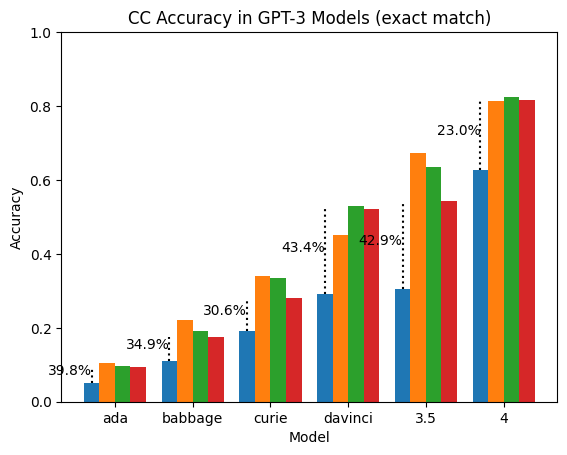

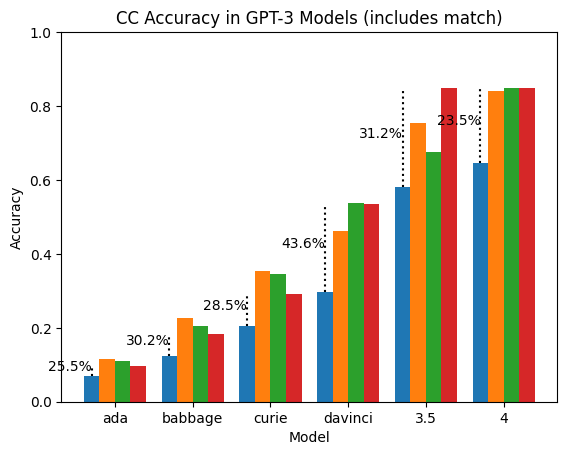

In [48]:
# GPT-3 family
models = ['ada', 'babbage', 'curie', 'davinci', 'gpt-3.5-turbo_default_sysprompt', "gpt-4"]


# InstructGPT-3 family
# models = ['text-ada-001', 'text-babbage-001', 'text-curie-001', 'text-davinci-001', 'text-davinci-002', 'text-davinci-003', 'gpt-3.5-turbo_default_sysprompt', "gpt-4"]

# models = ['text-davinci-001', 'text-davinci-002', 'text-davinci-003', 'gpt-3.5-turbo_default_sysprompt', "gpt-4"]


models_to_short_names = {
    'ada': 'ada', 
    'babbage': 'babbage', 
    'curie': 'curie',
    'text-ada-001': 'ada', 
    'text-babbage-001': 'babbage', 
    'text-curie-001': 'curie',
    'text-davinci-001': '001', 
    'text-davinci-002': '002', 
    'text-davinci-003': '003',
    "davinci": "davinci", 
    'gpt-3.5-turbo': '3.5-turbo',
    "gpt-3.5-turbo_prefixwas a powerful smile at the radio want you want to be a sweet but it be in a bowl with a treaty going onto the shadeed": '3.5-turbo-prefixed',

    'gpt-3.5-turbo_default_sysprompt': "3.5",
    "gpt-4": "4"}

data = {}

# Load data from JSON files
for model in models:
    with open(f'results/CC_results_{model}.json', 'r') as infile:
        data[model] = json.load(infile)["summary"]
        # print(data[model])
        json_data = json.dumps(data[model], indent=4)

        # Print JSON data
        # print(json_data)
        # print(data[model])
        # print("\n\n")

# Calculate full question accuracy for each prompt type and model
dataset_size = 1000
direct_answer_accuracy_EM = [data[model]['full_question_direct_answer_correct_EM'] / dataset_size for model in models]
chain_of_thought_accuracy_EM = [data[model]['full_question_chain_of_thought_correct_EM'] / dataset_size for model in models]
self_ask_accuracy_EM = [data[model]['full_question_self_ask_correct_EM'] / dataset_size for model in models]
subquestions_accuracy_EM = [data[model]['both_subquestions_correct_EM'] / dataset_size for model in models]

direct_answer_accuracy_CEM = [data[model]['full_question_direct_answer_correct_CEM'] / dataset_size for model in models]
chain_of_thought_accuracy_CEM = [data[model]['full_question_chain_of_thought_correct_CEM'] / dataset_size for model in models]
self_ask_accuracy_CEM = [data[model]['full_question_self_ask_correct_CEM'] / dataset_size for model in models]
subquestions_accuracy_CEM = [data[model]['both_subquestions_correct_CEM'] / dataset_size for model in models]
print(subquestions_accuracy_CEM)

# direct_answer_accuracy_GPT_opinion = [data[model]['full_question_direct_answer_correct_GPT_opinion'] / dataset_size for model in models]
# chain_of_thought_accuracy_GPT_opinion = [data[model]['full_question_chain_of_thought_correct_GPT_opinion'] / dataset_size for model in models]
# self_ask_accuracy_GPT_opinion = [data[model]['full_question_self_ask_correct_GPT_opinion'] / dataset_size for model in models]
# subquestions_accuracy_GPT_opinion = [data[model]['both_subquestions_correct_GPT_opinion'] / dataset_size for model in models]
# print(subquestions_accuracy_GPT_opinion)

def plot_accuracies(direct_answer_accuracy, chain_of_thought_accuracy, self_ask_accuracy, subquestions_accuracy, match_type):
    # Bar plot settings
    bar_width = 0.2
    x = np.arange(len(models))

    # Plot the bar graphs
    fig, ax = plt.subplots()

    ax.bar(x - 3 * bar_width / 2, direct_answer_accuracy, width=bar_width, label='full question correct (direct answer)')
    ax.bar(x - bar_width / 2, chain_of_thought_accuracy, width=bar_width, label='full question correct (chain-of-thought)')
    ax.bar(x + bar_width / 2, self_ask_accuracy, width=bar_width, label='full question correct (self-ask)')
    ax.bar(x + 3 * bar_width / 2, subquestions_accuracy, width=bar_width, label='both subquestions correct')

    gaps = []
    for i, model in enumerate(models):

        difference = (subquestions_accuracy[i] - direct_answer_accuracy[i]) / (subquestions_accuracy[i]+.01) * 100
        y_start = direct_answer_accuracy[i]
        y_end = subquestions_accuracy[i]
        x_pos = x[i] - 3 * bar_width / 2
        gaps.append(difference)
        ax.vlines(x_pos, y_start, y_end, linestyle='dotted', color='black')
        ax.annotate(f'{difference:.1f}%', xy=(x_pos, (y_start + y_end) / 2), fontsize=10, color='black', ha='right')
    print(gaps)
    # Customize the plot
    ax.set_xlabel('Model')
    ax.set_ylabel('Accuracy')
    ax.set_title(f'CC Accuracy in GPT-3 Models ({match_type})')
    ax.set_xticks(x)
    ax.set_xticklabels([models_to_short_names[model] for model in models], fontsize=10)
    plt.ylim(0, 1.0)
    # ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=2)

    # Show the plot
    plt.plot()

# Call the function with the calculated accuracies
# print(sub)

plot_accuracies(direct_answer_accuracy_EM, chain_of_thought_accuracy_EM, self_ask_accuracy_EM, subquestions_accuracy_EM, "exact match")
plot_accuracies(direct_answer_accuracy_CEM, chain_of_thought_accuracy_CEM, self_ask_accuracy_CEM, subquestions_accuracy_CEM, "includes match")
# plot_accuracies(direct_answer_accuracy_GPT_opinion, chain_of_thought_accuracy_GPT_opinion, self_ask_accuracy_GPT_opinion, subquestions_accuracy_GPT_opinion, "GPT eval")

